# lab4 exercise
## Shang mingxia P-COM0077/19
## LING HUI TING P-COM0086/19

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

## Step 1. Data preprocessing

In [3]:
df=pd.read_csv('leaf.csv',names=['Class','Specimen Num','Eccentricity','Aspect Ratio','Elongation','Solidity','Stochastic Convexity',
'Isometric Factor','Maximal Indentation Depth','Lobedness','Average Intensity','Average Contrast','Smoothness',
'Third Moment','Uniformity','Entropy'])
df=df.dropna(axis=0,how='any')

Text(0, 0.5, 'Frequency')

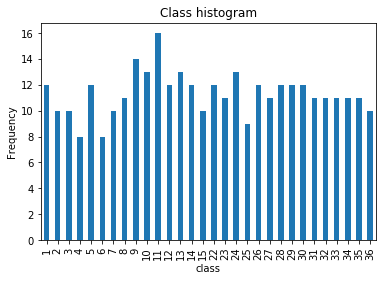

In [4]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()  
count_classes.plot(kind = 'bar') 
plt.title("Class histogram") 
plt.xlabel("class") 
plt.ylabel("Frequency")

### Q1: Explore the data to check, whether is it balance?

It's balanced data.

In [5]:
df.dtypes

Class                          int64
Specimen Num                   int64
Eccentricity                 float64
Aspect Ratio                 float64
Elongation                   float64
Solidity                     float64
Stochastic Convexity         float64
Isometric Factor             float64
Maximal Indentation Depth    float64
Lobedness                    float64
Average Intensity            float64
Average Contrast             float64
Smoothness                   float64
Third Moment                 float64
Uniformity                   float64
Entropy                      float64
dtype: object

### Q1: What type of attributes of the data?

We could use .dtypes to get the type of attributs as follows:
Then we could see all typys are numerical.

In [ ]:
sns.pairplot(df,hue='Class')

/Users/mac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


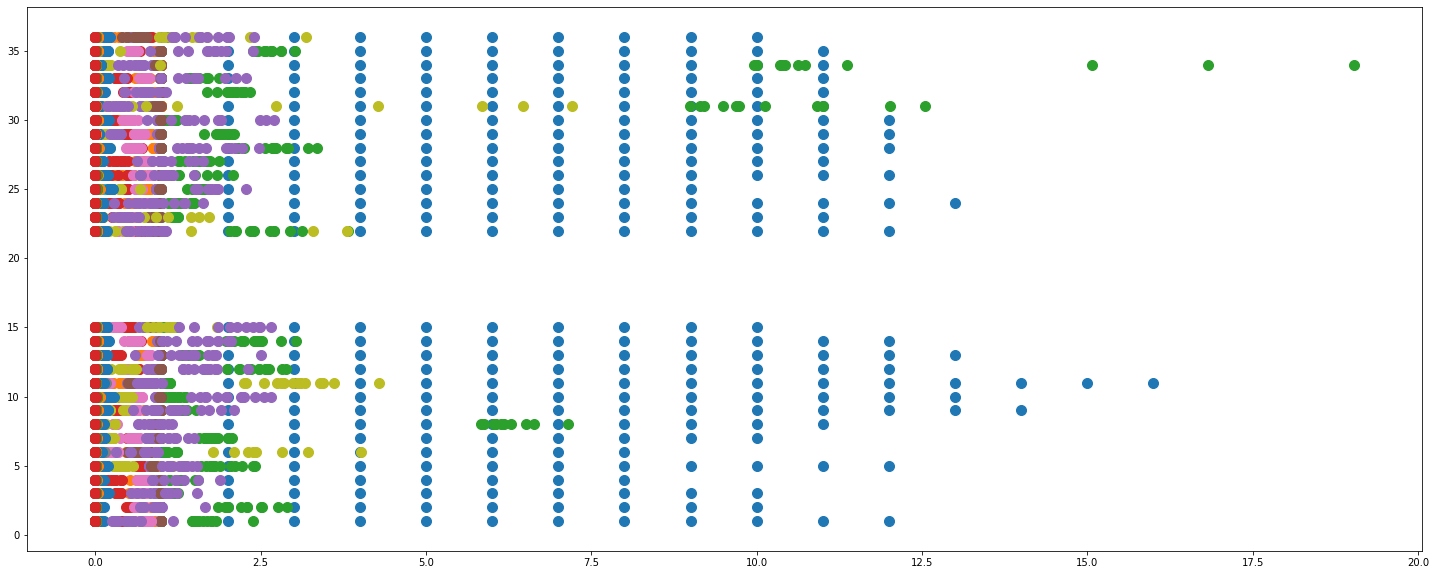

In [98]:
from matplotlib import pyplot
plt.figure(figsize=(25,10))
lrang=list(range(0,len(x.columns)))
for i in lrang:
    pyplot.scatter(x.iloc[:,i], y,s=100)
plt.show()

### Q1：Using a scatter plot, what pattern can you see? Why?

You can see there is a blank between 16 and 22, because there is no class of data in range 16 and 22.

### Step1.1 Get correlation

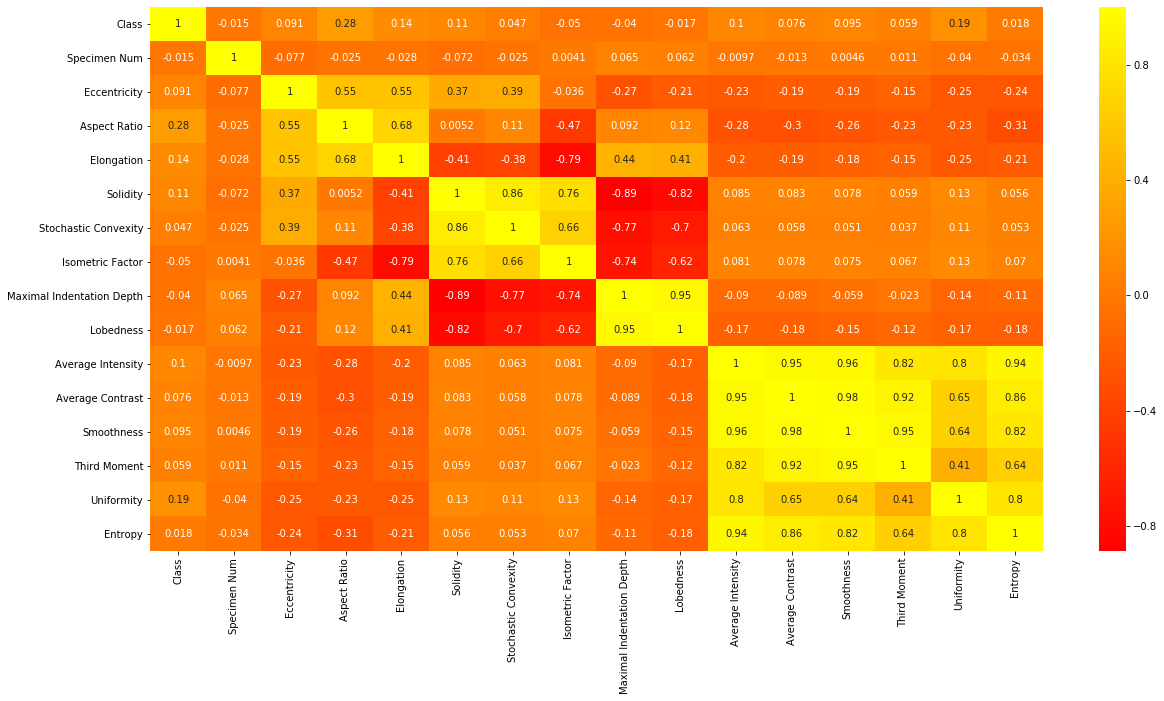

In [99]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='autumn')
plt.show()

In [100]:
df_corr=abs(df.corr())
df_corr['Class'].sort_values(ascending=False)

Class                        1.000000
Aspect Ratio                 0.275210
Uniformity                   0.187717
Elongation                   0.141275
Solidity                     0.111843
Average Intensity            0.102453
Smoothness                   0.094885
Eccentricity                 0.091415
Average Contrast             0.076246
Third Moment                 0.058520
Isometric Factor             0.049767
Stochastic Convexity         0.046678
Maximal Indentation Depth    0.040026
Entropy                      0.017690
Lobedness                    0.017048
Specimen Num                 0.015142
Name: Class, dtype: float64

### Q1:What attribute is useful and what is not? why?

from this ranking, we could see Entropy,Lobedness,Specimen Num are useless

In [101]:
y = df['Class']
x = df.drop(columns=['Class'],axis=1)

### Step1.2 Scale data && get testdata and traindata

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=0)
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test = scaller.transform(x_test)

In [103]:
gnb = GaussianNB()

In [117]:
# Train classifier
gnb.fit(x_train,y_train)
# Test the classifier
predict = gnb.predict(x_test)
# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%" .format(x_test.shape[0], (y_test != predict).sum(),
gnb.score(x_test,y_test)*100 ))

Number of mislabeled points out of a total 136 points : 45, performance 66.91%


In [62]:
from sklearn.model_selection import cross_val_score 
score = cross_val_score(gnb, x_train, y_train,cv=3) 
print("The prediction accuracy is: {0:2.2f}{1:s}".format(score.mean()*100,"%")) 

The prediction accuracy is: 68.08%


In [81]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
# Test the classifier
predict = knn.predict(x_test)
# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%" .format(x_test.shape[0], (y_test != predict).sum(),
knn.score(x_test,y_test)*100 ))

Number of mislabeled points out of a total 136 points : 78, performance 42.65%


In [116]:
dtree = DecisionTreeClassifier().fit(x_train, y_train) 
predict = dtree.predict(x_test)
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%" .format(x_test.shape[0], (y_test != predict).sum(),
dtree.score(x_test,y_test)*100 ))

Number of mislabeled points out of a total 136 points : 60, performance 55.88%


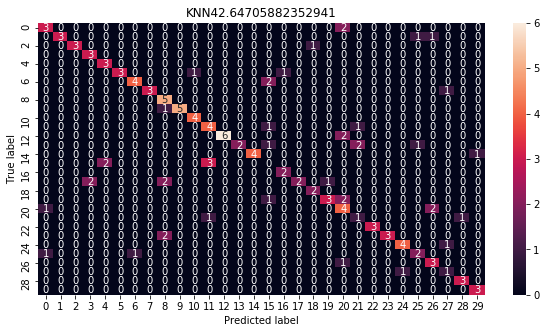

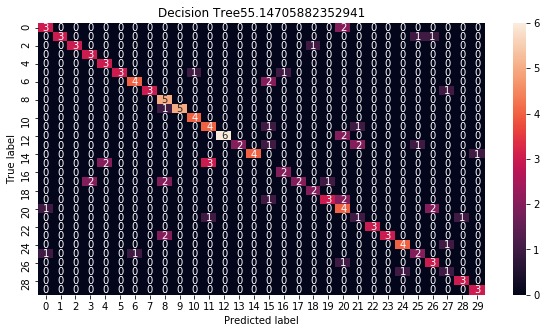

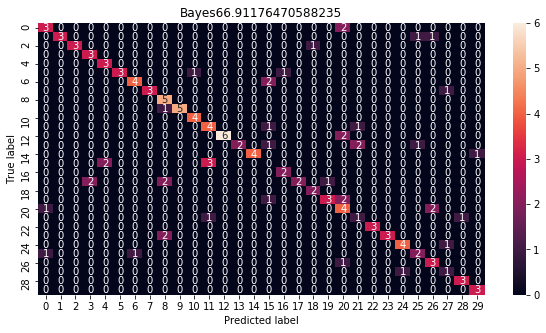

In [124]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn import metrics 
from sklearn.metrics import auc
classifiers = [knn,dtree,gnb]
classifier_names = ['KNN','Decision Tree','Bayes']
# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)
for classifier,classifier_name in zip(classifiers,classifier_names):
    classifier.fit(x_train,y_train)
    # plot the confusion matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(cm_df, annot=True, fmt='g')
    plt.title(classifier_name + str(classifier.score(x_test,y_test)*100)) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

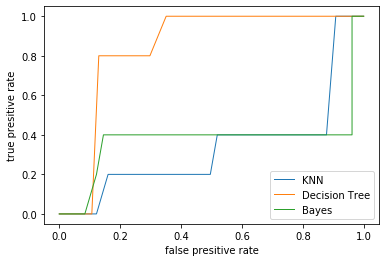

In [123]:
for classifier,classifier_name in zip(classifiers,classifier_names):
    classifier.fit(x_train,y_train)
    predicted_labels = classifier.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, predicted_labels, pos_label=2)
    plt.plot(fpr,tpr,linewidth=1,label=classifier_name)
plt.xlabel("false presitive rate")
plt.ylabel("true presitive rate")
plt.legend(loc=4)
plt.show()

[0.4264705882352941, 0.5588235294117647, 0.6691176470588235]


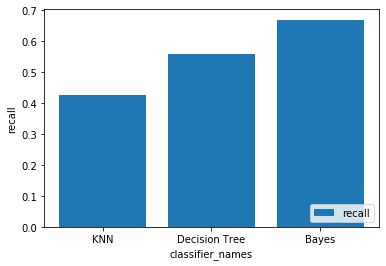

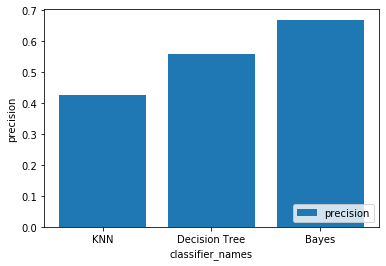

In [142]:
from sklearn.metrics import accuracy_score
precisions=[]
recalls = []
for classifier,classifier_name in zip(classifiers,classifier_names):
    classifier.fit(x_train,y_train)
    predicted_labels = classifier.predict(x_test)
    precision= accuracy_score(y_test, predicted_labels)
    recall=metrics.recall_score(y_test, predicted_labels, average='micro')
    recalls.append(recall)
    precisions.append(precision)
labels = ['recall','precision']
pfs = [recalls,precisions]
for label1,pf in zip(labels,pfs):
    plt.bar(classifier_names, pf, label=label1)
    plt.xlabel("classifier_names")
    plt.ylabel(label1)
    plt.legend(loc=4)
    plt.show()